# Práctica 1 

Pasos: 

1. Llenar información de estatura y edad en la pestaña "Normales"
2. Utilizar estos datos para implementar 

    - Hard clustering con k-means sin sklearn
    - Soft clustering con GMM usando sklearn (sklearn.mixture.GaussianMixture)

3. Ejecutar al menos 5 experimentos para seleccionar el valor de "K"

    - Ambos métodos pueden usar el mismo valor de "K".
    - Analizar el centroide de cada cluster y determinar si es posible asignar una categoría a cada cluster

4. Analizar y concluir si el método del codo es adecuado para este problema

5. Usar los datos en la segunda pestaña (valtest(normales)) y estimar:

    - El cluster que k-means asigna a cada uno.
    - La probabilidad de pertenecer a cada cluster según GMM.

6. Usar GMM y simular 100 observaciones para estimar (estimación de Monte Carlo), el valor esperado (promedio) de la función f:

    f(edad, estatura) = estatura / edad 




In [1]:
import pandas as pd 
import numpy as np 
import random
from scipy.spatial.distance import cdist
import random
import matplotlib.pyplot as plt 
from celluloid import Camera

# Se cargan los datos de "estaturas.xlsx"
dfs = pd.read_excel("estaturas.xlsx", sheet_name = None)

# Se obtienen los datos de "entrenamiento"
train_data = dfs["normales"]

-----

## K-Means

### Función

In [16]:
def KMeans(data, k = 3, iter_max = 100, animate = 0): 

    # ====================
    # INICIALIZACIÓN
    # ====================

    # Se crea una figura y una "cámara"
    if animate:
        fig = plt.figure()
        camera = Camera(fig)

    # Se inicializan las clases "anteriores" y "actuales"
    old_classes = -np.ones((data.shape[0]))
    classes = -2*np.ones((data.shape[0]))

    # Se eligen "k" índices de "data"
    centroid_inds = random.sample(range(0, len(data)), k)

    # Se extraen los "centroides" a partir de los "k" índices seleccionados al azar
    centroids = data.iloc[centroid_inds, :].to_numpy()

    # Se convierte el dataset de entrenamiento a un array de numpy
    dataset = data.to_numpy()

    # Se inicializa el número de iteraciones
    it = 0

    # Mientras las clases cambien y el número de iteraciones sea
    # menor al threshold máximo
    while not all(old_classes == classes) and (it <= iter_max):

        # ====================
        # DISTANCIAS
        # ====================

        # Se inicializa una matriz vacía y sin columnas de distancias
        distances = np.empty((dataset.shape[0], 0))

        # Se itera sobre cada centroide
        for i in range(0, k):

            # Coordenadas del centroide "i"
            centroid = centroids[i, :]

            # Se redimensiona el centroide "i"
            centroid = np.reshape(centroid, (1, centroid.shape[0]))

            # 1. Se obtienen las distancias de cada centroide al resto de puntos
            # 2. Se trasponen las distancias para obtener un vector columna
            # 3. Se concatena horizontalmente el nuevo vector columna a la matriz de distancias
            distances = np.hstack((distances, cdist(centroid, dataset).T ))


        # ====================
        # CLASES
        # ====================

        # Se toma nota del valor previo de las clases
        old_classes = classes

        # Se utiliza "argmin()" para conseguir el cluster al que pertenece cada punto
        classes = np.argmin(distances, axis = 1)

        # Se calcula el costo, el cual únicamente consiste de la suma de todas
        # las distancias cuadradas de los centroides a sus puntos respectivos
        cost = np.sum(np.min(distances, axis = 1)**2)

        # ====================
        # NUEVOS CENTROIDES
        # ====================

        # Se "vacía" el vector de centroides
        centroids = np.empty((0, dataset.shape[1]))

        # Se itera sobre cada cluster
        for i in range(0, k):

            # 1. Se obtiene la media de todos los puntos de la clase
            # 2. Se asigna este como el nuevo centroide de la clase
            new_centroid = np.mean(dataset[classes == i, :], axis = 0)

            # Se concatenan verticalmente los nuevos centroides
            centroids = np.vstack((centroids, new_centroid))

        # ====================
        # PLOT
        # ====================

        # Plot de los centroides y puntos de cada clase
        if animate: 
            plt.scatter(dataset[:,0], dataset[:,1], c=classes, cmap = "viridis")
            plt.scatter(centroids[:,0], centroids[:,1], s = 150, alpha = 0.6, c = "black")

            # Texto de plot
            plt.xlabel("Altura")
            plt.ylabel("Edad")
            plt.title(f"K-Means \nIteración: {it}")

            # Se toma una foto del plot
            camera.snap()
    
        # Se incrementa el número de iteración
        it += 1

    # Se guarda la animación como un gif
    if animate: 
        animation = camera.animate()
        animation.save(f'animaciones\kmeans_k={k}.gif', writer = "pillow")

    return centroids, cost

### Experimentos: Método del Codo

C:\Users\eddys\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\eddys\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


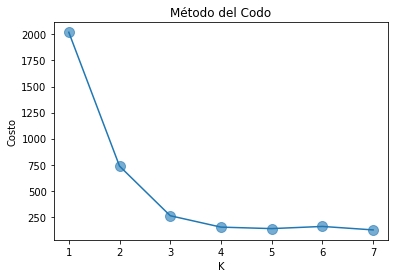

In [37]:
# Se inicializa un vector para almacenar los valores de costo
historial_costo = np.array([])

# Experimentos para el valor de K
for k in range(1,10):

    # Se ejecuta el "K-Means" con la "k" dada
    centroides, costo = KMeans(train_data, k = k, iter_max = 100, animate = 0)

    # Se hace "append" al historial de costo
    historial_costo = np.append(historial_costo, costo)

# Creación de vectores para graficar
x = np.array([range(1,10)], ).T
y = np.reshape(historial_costo, (1, len(historial_costo))).T

plt.plot(x, y)
plt.scatter(x, y, s = 100, alpha = 0.6)
plt.xlabel("K")
plt.ylabel("Costo")
plt.title("Método del Codo")
plt.show()

De acuerdo con los resultados obtenidos previamente parece que el valor óptimo para "K" es 3 o 4. En este caso se utilizará un valor de 3 ya que este parece ser en mayor medida el "codo" de la gráfica. A continuación se presentan los resultados obtenidos utilizando una K de 3 (para ver la animación correspondiente ir al archivo "kmeans_k=3.gif" dentro de la carpeta "animaciones").

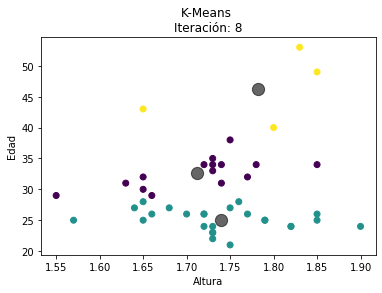

In [31]:
centroides, costo = KMeans(train_data, k = 3, iter_max = 100, animate = 1)

Los resultados parecen ser satisfactorios, con el algoritmo separando a los alumnos de la maestría exclusivamente por su edad. Específicamente los separó en tres grupos o categorías: Personas de 20 a 29 años, de 30 a 39 años y finalmente de 40 a 60 años (siendo este último el menos numeroso). Se intentó con diferentes valores aleatorios iniciales para la posición de los centroides, pero incluso luego de estas pruebas, los puntos tendieron a converger bajo la misma clasificación presentada previamente.

-----

## GMM

### Función 